In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.losses import Huber

<h2>Data Viewing</h2>

In [2]:
data = pd.read_csv('./data/gsmbaseline_stats.csv')

In [3]:
data.keys()

Index(['IDX', 'IPC', 'CYCLE', 'INSTNUM', 'REGR', 'REGW', 'ROBR', 'ROBW',
       'MEMR', 'MEMW', 'Branches', 'PVF'],
      dtype='object')

<h3>Baseline</h3>

In [36]:
totalLength = 6000
instnum = np.array(data['INSTNUM'])[0: totalLength].reshape(-1, 1)
ipc = np.array(data['IPC'])[0: totalLength].reshape(-1, 1)
cycle = np.array(data['CYCLE'])[0: totalLength].reshape(-1, 1)
regr = np.array(data['REGR'])[0: totalLength].reshape(-1, 1)
regw = np.array(data['REGW'])[0: totalLength].reshape(-1, 1)
robr = np.array(data['ROBR'])[0: totalLength].reshape(-1, 1)
robw = np.array(data['ROBW'])[0: totalLength].reshape(-1, 1)
memr = np.array(data['MEMR'])[0: totalLength].reshape(-1, 1)
memw = np.array(data['MEMW'])[0: totalLength].reshape(-1, 1)
branches = np.array(data['Branches'])[0: totalLength].reshape(-1, 1)

pvf = np.array(data['PVF'])[0: totalLength].reshape(-1, 1)

In [37]:
features = np.concatenate((instnum, ipc, cycle, regr, regw, robr, robw, memr, memw, branches), axis=1)
target = pvf

In [38]:
features.shape

(6000, 10)

In [39]:
target.shape

(6000, 1)

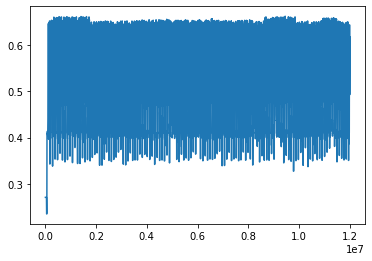

In [40]:
plt.plot(cycle, pvf)

In [41]:
batchSize= 100;
num_batches = features.shape[0] / batchSize

num_train = int(num_batches * 0.8)
num_test = int(num_batches * 0.2)

X_train = features[0: batchSize * num_train]
y_train = target[0: batchSize * num_train]

X_test = features[batchSize * num_train: ]
y_test = target[batchSize * num_train: ]

X_train = np.array(np.split(X_train, batchSize, axis=0))
y_train = np.array(np.split(y_train, batchSize, axis=0))

X_test = np.array(np.split(X_test, batchSize, axis=0))
y_test = np.array(np.split(y_test, batchSize, axis=0))

In [42]:
X_train.shape

(100, 48, 10)

In [76]:
def buildModel(batchSize, featureNum, n_values):
    X_input = Input(shape=(batchSize, featureNum))
    X = BatchNormalization()(X_input)
    
    X = LSTM(units=8, return_sequences=True)(X)
    X = LSTM(units=1, return_sequences=True)(X)
    
    output = Dense(n_values, activation='relu')(X)
    
    model = Model(inputs=X_input, outputs=output)
    
    return model

In [77]:
dlModel = buildModel(batchSize, features.shape[1], 1)

In [78]:
dlModel.compile(optimizer=Adam(lr=1e-3), loss=Huber())

In [79]:
hist = dlModel.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
4/4 [==============================] - 2s 436ms/step - loss: 0.1038 - val_loss: 0.1384
Epoch 2/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0939 - val_loss: 0.1338
Epoch 3/200
4/4 [==============================] - 0s 25ms/step - loss: 0.0864 - val_loss: 0.0931
Epoch 4/200
4/4 [==============================] - 0s 40ms/step - loss: 0.0808 - val_loss: 0.0665
Epoch 5/200
4/4 [==============================] - 0s 32ms/step - loss: 0.0748 - val_loss: 0.0488
Epoch 6/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0699 - val_loss: 0.0379
Epoch 7/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0644 - val_loss: 0.0302
Epoch 8/200
4/4 [==============================] - 0s 37ms/step - loss: 0.0608 - val_loss: 0.0252
Epoch 9/200
4/4 [==============================] - 0s 65ms/step - loss: 0.0546 - val_loss: 0.0216
Epoch 10/200
4/4 [==============================] - 0s 62ms/step - loss: 0.0506 - val_loss: 0.0190
Epoch 11/200
4/4 [

Epoch 77/200
4/4 [==============================] - 0s 26ms/step - loss: 0.0068 - val_loss: 0.0125
Epoch 78/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0069 - val_loss: 0.0126
Epoch 79/200
4/4 [==============================] - 0s 27ms/step - loss: 0.0068 - val_loss: 0.0126
Epoch 80/200
4/4 [==============================] - 0s 27ms/step - loss: 0.0068 - val_loss: 0.0126
Epoch 81/200
4/4 [==============================] - 0s 27ms/step - loss: 0.0067 - val_loss: 0.0125
Epoch 82/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0068 - val_loss: 0.0125
Epoch 83/200
4/4 [==============================] - 0s 27ms/step - loss: 0.0067 - val_loss: 0.0124
Epoch 84/200
4/4 [==============================] - 0s 25ms/step - loss: 0.0067 - val_loss: 0.0123
Epoch 85/200
4/4 [==============================] - 0s 25ms/step - loss: 0.0066 - val_loss: 0.0122
Epoch 86/200
4/4 [==============================] - 0s 26ms/step - loss: 0.0067 - val_loss: 0.0122
Epoch 87/2

4/4 [==============================] - 0s 27ms/step - loss: 0.0060 - val_loss: 0.0091
Epoch 160/200
4/4 [==============================] - 0s 26ms/step - loss: 0.0060 - val_loss: 0.0091
Epoch 161/200
4/4 [==============================] - 0s 26ms/step - loss: 0.0060 - val_loss: 0.0091
Epoch 162/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0060 - val_loss: 0.0091
Epoch 163/200
4/4 [==============================] - 0s 25ms/step - loss: 0.0060 - val_loss: 0.0090
Epoch 164/200
4/4 [==============================] - 0s 26ms/step - loss: 0.0060 - val_loss: 0.0090
Epoch 165/200
4/4 [==============================] - 0s 27ms/step - loss: 0.0060 - val_loss: 0.0090
Epoch 166/200
4/4 [==============================] - 0s 27ms/step - loss: 0.0060 - val_loss: 0.0089
Epoch 167/200
4/4 [==============================] - 0s 26ms/step - loss: 0.0060 - val_loss: 0.0089
Epoch 168/200
4/4 [==============================] - 0s 25ms/step - loss: 0.0060 - val_loss: 0.0089
Epoch 169/200


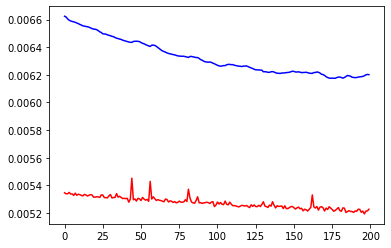

In [74]:
plt.plot(hist.history['loss'], 'red', label='loss')
plt.plot(hist.history['val_loss'], 'blue', label='val_loss')
plt.show()

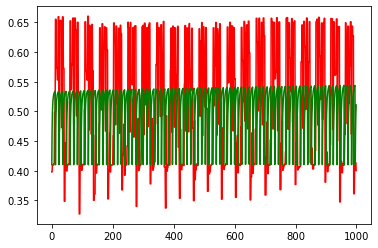

In [75]:
y_predict = dlModel.predict(X_test)
plt.plot(y_test.ravel()[0: 1000], 'red')
plt.plot(y_predict.ravel()[0: 1000], 'green')